In [14]:
%reload_ext autoreload
%autoreload 2

from SWN_No_Res_Constrn import SWN_No_RC
import matplotlib.pyplot as plt
import numpy as np

### Time series

In [17]:
swn = SWN_No_RC(nepochs=20000, 
                dt=0.05, 
                lambda_o=0.07, 
                plot_hysteresis=False)
swn.run_model()

LAMBDA_O=0.07, Global Order(R)=0.02953397982317619
LAMBDA_O=0.07, Global Order(R)=0.9791054468346274
LAMBDA_O=0.07, Global Order(R)=0.979105446834627
LAMBDA_O=0.07, Global Order(R)=0.9791054468346272
LAMBDA_O=0.07, Global Order(R)=0.979105446834627
LAMBDA_O=0.07, Global Order(R)=0.979105446834627
LAMBDA_O=0.07, Global Order(R)=0.9791054468346266
LAMBDA_O=0.07, Global Order(R)=0.9791054468346269
LAMBDA_O=0.07, Global Order(R)=0.9791054468346264
LAMBDA_O=0.07, Global Order(R)=0.9791054468346264
0.9791054468346263


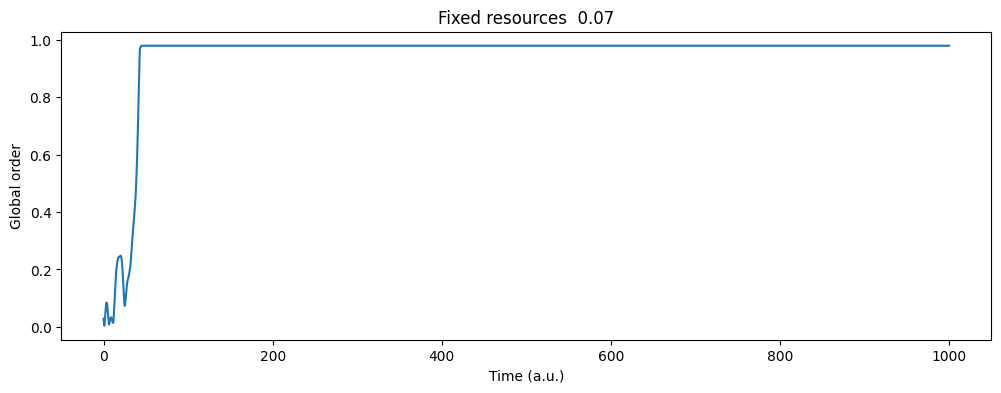

In [18]:
f = plt.figure(figsize=(12, 4))
plt.title("Fixed resources  " + str(swn.LAMBDA_O)) 
plt.plot(np.linspace(0, swn.NEPOCHS-1, swn.NEPOCHS)*swn.DT, swn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global order")
plt.xlabel("Time (a.u.)")
plt.show()

### Hysteresis diagram

In [26]:
swn = SWN_No_RC(nepochs=2000000, 
                dt=0.05, 
                lambda_o=0.01, 
                plot_hysteresis=True, 
                epochs_per_lambda_o=20000, 
                step_size_lambda_o=0.003)
swn.run_model()

In [ ]:
LAMBDA_O_NRC_ = swn.LAMBDA_O_
LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_NRC_[:len(LAMBDA_O_NRC_)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_NRC_[len(LAMBDA_O_NRC_)//2:len(LAMBDA_O_NRC_)], return_index=True)

GLOBAL_ORDER_VERBOSE_NRC = swn.GLOBAL_ORDER_VERBOSE

**Loading from saved file instead**

In [21]:
loaded_data = np.load("../../../../datastore/explosive_sync/Small world network/data_adaptive-a_0.01_b_0.npz")

# Access the arrays using the keys provided while saving
GLOBAL_ORDER_VERBOSE_NRC = loaded_data['arr1']
LAMBDA_O_NRC_ = loaded_data['arr2']
LAMBDA_NRC_ = loaded_data['arr3']

LAMBDA_O_fwd, idx_fwd = np.unique(LAMBDA_O_NRC_[:len(LAMBDA_O_NRC_)//2], return_index=True)
LAMBDA_O_bkwd, idx_bkwd = np.unique(LAMBDA_O_NRC_[len(LAMBDA_O_NRC_)//2:len(LAMBDA_O_NRC_)], return_index=True)

print("done")

done


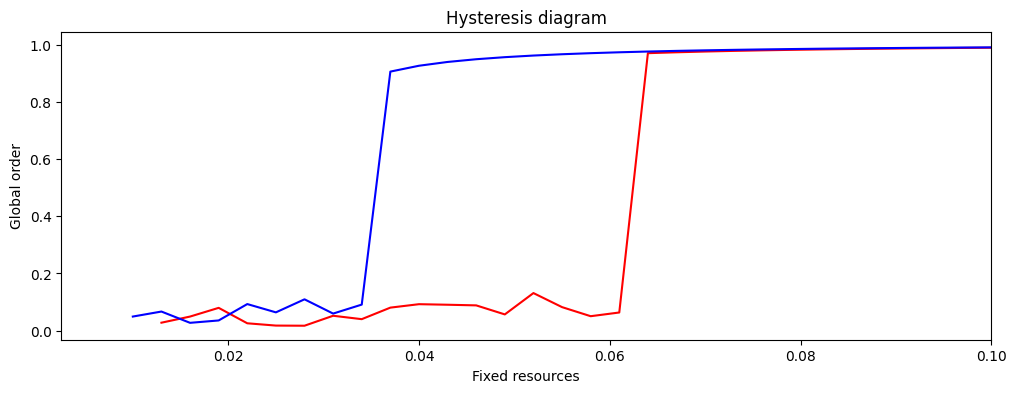

In [23]:
f = plt.figure(figsize=(12, 4))
plt.title("Hysteresis diagram") 

plt.plot(LAMBDA_O_fwd, GLOBAL_ORDER_VERBOSE_NRC[idx_fwd], 
         label="forward", color='red')
plt.plot(LAMBDA_O_bkwd, 
         GLOBAL_ORDER_VERBOSE_NRC[len(LAMBDA_O_NRC_)//2 + idx_bkwd], 
         label="backward", 
         color='blue')

plt.ylabel("Global order")
plt.xlabel("Fixed resources")
plt.xlim(right=0.1)
plt.show()